# Import libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

## Read the file

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Lets check what actually data contains

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## What if any column has missing entries lets find it out along with its datatype

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### No missing values 

In [5]:
data.customerID[data.customerID.duplicated()]

Series([], Name: customerID, dtype: object)

## Customer Id is also not repeated which means we are having unique entries

In [6]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## No duplicate entries

<AxesSubplot:ylabel='Dependents'>

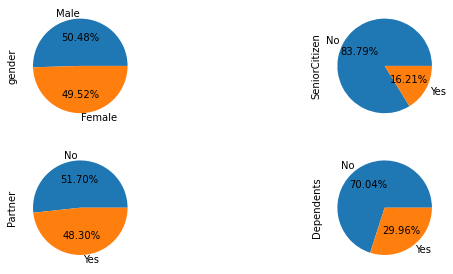

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(4,2,1) 
data.gender.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.subplot(4,2,2)
data.SeniorCitizen.value_counts().rename({0:'No',1:'Yes'}).plot(kind='pie',autopct='%0.2f%%')
plt.subplot(4,2,3)
data.Partner.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.subplot(4,2,4)
data.Dependents.value_counts().plot(kind='pie',autopct='%0.2f%%')

## We can see male and female customers are almost same 
## And percentage of senior citizen buying product is less 
## And independent members buying probability is max

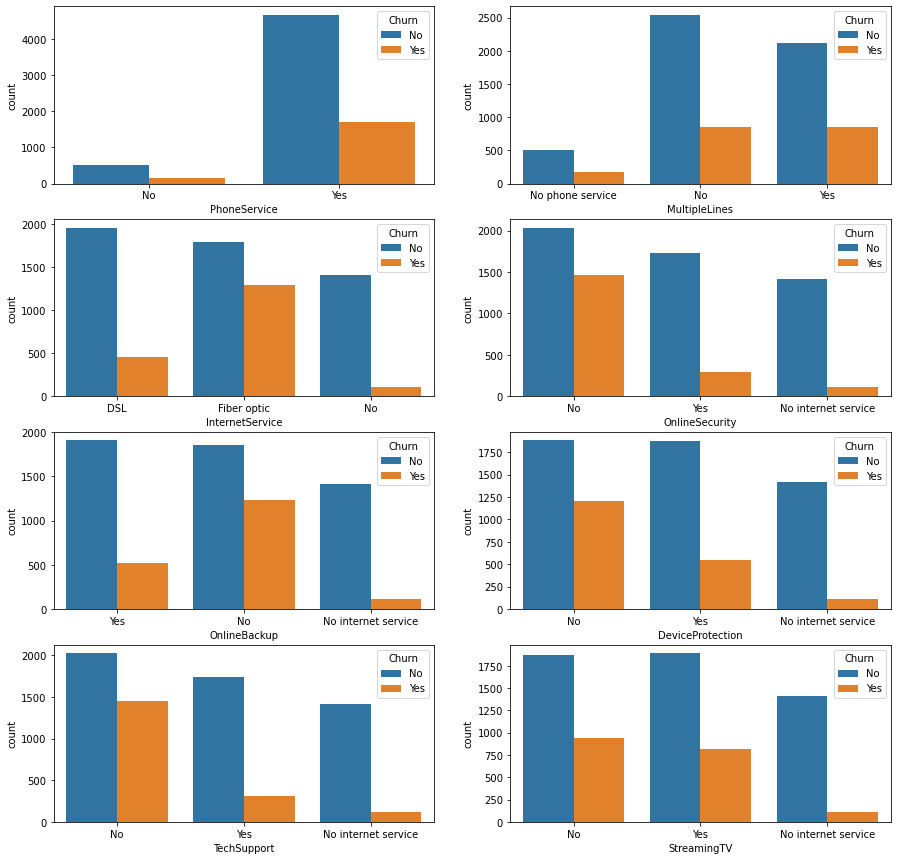

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.countplot(x=data.PhoneService,hue=data.Churn)
plt.subplot(4,2,2)
sns.countplot(x=data.MultipleLines,hue=data.Churn)
plt.subplot(4,2,3)
sns.countplot(x=data.InternetService,hue=data.Churn)
plt.subplot(4,2,4)
sns.countplot(x=data.OnlineSecurity,hue=data.Churn)
plt.subplot(4,2,5)
sns.countplot(x=data.OnlineBackup,hue=data.Churn)
plt.subplot(4,2,6)
sns.countplot(x=data.DeviceProtection,hue=data.Churn)
plt.subplot(4,2,7)
sns.countplot(x=data.TechSupport,hue=data.Churn)
plt.subplot(4,2,8)
sns.countplot(x=data.StreamingTV,hue=data.Churn)
#plt.tight_layout()
plt.show()
plt.tight_layout()

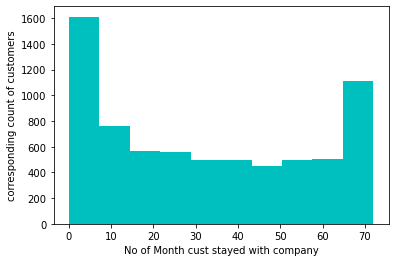

In [9]:
data.tenure.plot(kind='hist',color='c')
plt.xlabel('No of Month cust stayed with company')
plt.ylabel('corresponding count of customers')
plt.show()

## From this we conclude that some customer uses service upto 10 months and change operator

In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:ylabel='PaperlessBilling'>

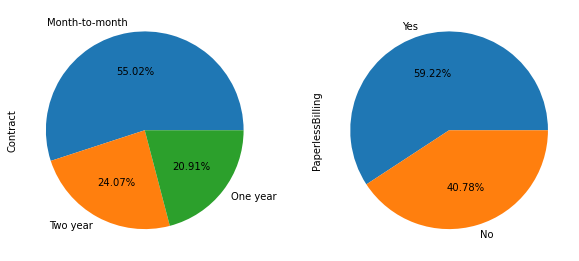

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data.Contract.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.subplot(2,2,2)
data.PaperlessBilling.value_counts().plot(kind='pie',autopct='%0.2f%%')

<AxesSubplot:ylabel='PaymentMethod'>

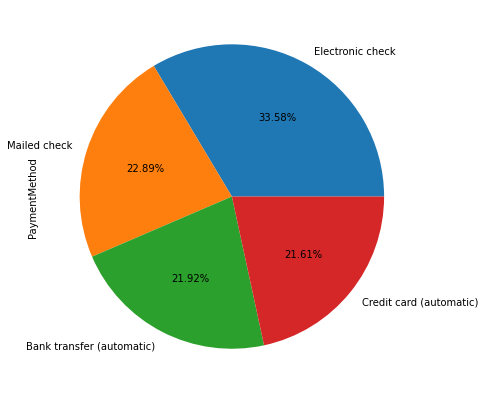

In [12]:
plt.figure(figsize=(7,7))
data.PaymentMethod.value_counts().plot(kind='pie',autopct='%0.2f%%')

Text(0.5, 0, 'Monthly charges in rs')

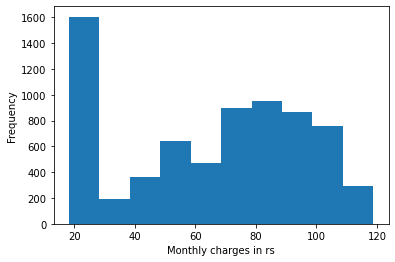

In [13]:
data.MonthlyCharges.plot(kind='hist')
plt.xlabel('Monthly charges in rs')

## from this we can conclude that cusomer having monthly charges upto 20-30 or 70-110 is more probabale

In [14]:
data.shape

(7043, 21)

In [15]:
data.drop((data.TotalCharges[data.TotalCharges.str.find(' ')>-1]).index,inplace=True)
# dropped some entries of column Total charges 

In [16]:
data.shape

(7032, 21)

In [17]:
data['TotalCharges'] = data.TotalCharges.astype('f')

<AxesSubplot:ylabel='Frequency'>

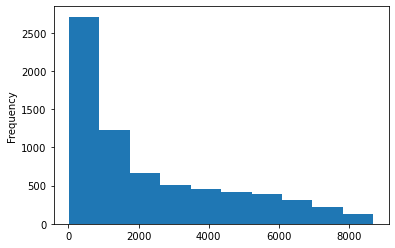

In [18]:
data.TotalCharges.plot(kind='hist')

## customers with total charges 1000 and below are more as compared to others 

In [19]:
data.drop(labels='SeniorCitizen',axis=1).corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


<AxesSubplot:ylabel='Churn'>

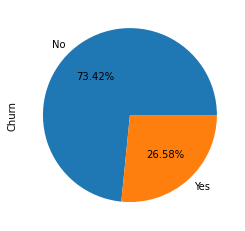

In [20]:
data.Churn.value_counts().plot(kind='pie',autopct='%0.2f%%')

## 26% people had left the operator due to some issue

<AxesSubplot:xlabel='gender', ylabel='count'>

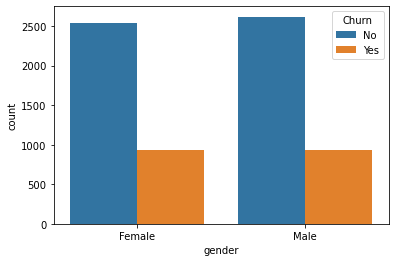

In [21]:
sns.countplot(x=data.gender,hue=data.Churn)

In [22]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [23]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

In [24]:
p = data.select_dtypes(include=['O'])
p.drop(columns=['customerID'],inplace=True)
p.head()

C:\Users\SANIKA\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


## Labelling all categorical columns

In [25]:
lb = LabelEncoder()

In [26]:
data[p.columns] = p.apply(lb.fit_transform)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.850000,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.500000,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.150002,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.750000,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.649994,1


In [27]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

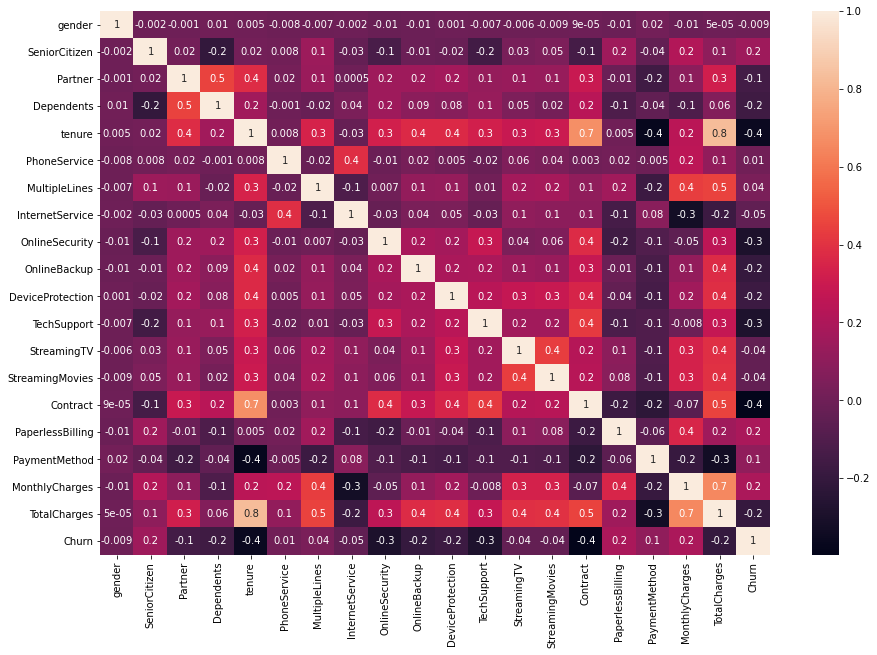

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='0.1g')

## as we can see tenure and contract are having strong correlation so we neglect contract

In [29]:
data.drop(columns=['Contract','tenure'],inplace=True)

In [30]:
X = data.drop(columns=['customerID','Churn'])

In [31]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,1,2,29.85,29.850000
1,1,0,0,0,1,0,0,2,0,2,0,0,0,0,3,56.95,1889.500000
2,1,0,0,0,1,0,0,2,2,0,0,0,0,1,3,53.85,108.150002
3,1,0,0,0,0,1,0,2,0,2,2,0,0,0,0,42.30,1840.750000
4,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2,70.70,151.649994


In [32]:
y = data.Churn

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Model

In [34]:
model1 = LogisticRegression(solver='liblinear')

In [35]:
model1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [36]:
y_pred1 = model1.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred1)

0.7987936234381732

In [38]:
confusion_matrix(y_test,y_pred1)

array([[1551,  160],
       [ 307,  303]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1711
           1       0.65      0.50      0.56       610

    accuracy                           0.80      2321
   macro avg       0.74      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321



## Bernoulli Naive Bayes 

In [40]:
model2 = BernoulliNB()

In [41]:
model2.fit(X_train,y_train)

BernoulliNB()

In [42]:
y_pred2 = model2.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.7345971563981043

In [44]:
confusion_matrix(y_test,y_pred2)

array([[1315,  396],
       [ 220,  390]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1711
           1       0.50      0.64      0.56       610

    accuracy                           0.73      2321
   macro avg       0.68      0.70      0.68      2321
weighted avg       0.76      0.73      0.74      2321



## Support vector classifier

In [46]:
model3 = SVC()

In [47]:
model3.fit(X_train,y_train)

SVC()

In [48]:
y_pred3 = model3.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred3)

0.7371822490305903

In [50]:
confusion_matrix(y_test,y_pred3)

array([[1711,    0],
       [ 610,    0]], dtype=int64)

## Some entries are zero so we'll see classification report for this model

## Decision Tree Model

In [51]:
model4 = DecisionTreeClassifier()

In [52]:
model4.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred4 = model4.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred4)

0.7169323567427833

In [55]:
confusion_matrix(y_test,y_pred4)

array([[1379,  332],
       [ 325,  285]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1711
           1       0.46      0.47      0.46       610

    accuracy                           0.72      2321
   macro avg       0.64      0.64      0.64      2321
weighted avg       0.72      0.72      0.72      2321



## Roc curves for different models

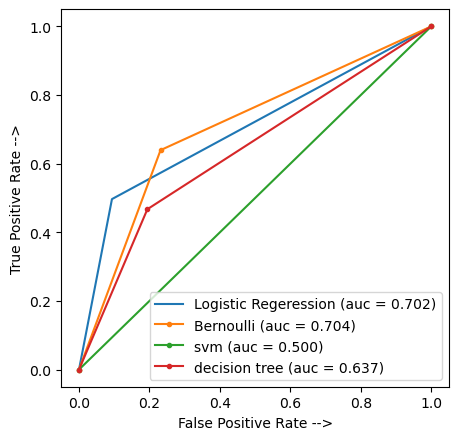

In [57]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred1)
auc_logistic = auc(logistic_fpr, logistic_tpr)

bern_fpr, bern_tpr, threshold1 = roc_curve(y_test, y_pred2)
auc_bern = auc(bern_fpr, bern_tpr)

svm_fpr, svm_tpr, threshold2 = roc_curve(y_test, y_pred3)
auc_svm = auc(svm_fpr, svm_tpr)

d_fpr, d_tpr, threshold3 = roc_curve(y_test, y_pred4)
auc_d = auc(d_fpr, d_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='Logistic Regeression (auc = %0.3f)' % auc_logistic)
plt.plot(bern_fpr, bern_tpr, marker='.', label='Bernoulli (auc = %0.3f)' % auc_bern)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm (auc = %0.3f)' % auc_svm)
plt.plot(d_fpr, d_tpr, marker='.', label='decision tree (auc = %0.3f)' % auc_d)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()